In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('B500Kflight.csv', sep=',', skipinitialspace=True)

In [3]:
df.isnull().any() # or df.isnull().sum()

fl_date                False
mkt_unique_carrier     False
branded_code_share     False
mkt_carrier            False
mkt_carrier_fl_num     False
op_unique_carrier      False
tail_num                True
op_carrier_fl_num      False
origin_airport_id      False
origin                 False
origin_city_name       False
dest_airport_id        False
dest                   False
dest_city_name         False
crs_dep_time           False
dep_time                True
dep_delay               True
taxi_out                True
wheels_off              True
wheels_on               True
taxi_in                 True
crs_arr_time           False
arr_time                True
arr_delay               True
cancelled              False
cancellation_code       True
diverted               False
dup                    False
crs_elapsed_time       False
actual_elapsed_time     True
air_time                True
flights                False
distance               False
carrier_delay           True
weather_delay 

In [4]:
# percentage of nulls in columns only with nulls:
df.loc[:,list(df.loc[:,df.isnull().any()].columns)].isnull().sum()/(len(df))*100

tail_num                 0.3526
dep_time                 1.8728
dep_delay                1.8730
taxi_out                 1.9328
wheels_off               1.9328
wheels_on                1.9958
taxi_in                  1.9958
arr_time                 1.9958
arr_delay                2.2154
cancellation_code       98.0494
actual_elapsed_time      2.2154
air_time                 2.2154
carrier_delay           81.1046
weather_delay           81.1046
nas_delay               81.1046
security_delay          81.1046
late_aircraft_delay     81.1046
first_dep_time          99.2920
total_add_gtime         99.2920
longest_add_gtime       99.2920
no_name                100.0000
dtype: float64

In [5]:
# create new features, day of week and month for fl_date

df['fl_date'] = pd.to_datetime(df['fl_date'])
df['month'] = df['fl_date'].dt.month
df['day'] = df['fl_date'].dt.weekday
df['year'] = df['fl_date'].dt.year

In [6]:
# removing outliers R2 score performs well, r2 went from 0.1 to 0.3

df = df[df['arr_delay'] < 132] 
df = df[df['arr_delay'] > -132] 

df['arr_delay'].describe()

count    477399.000000
mean         -0.009225
std          26.284630
min         -91.000000
25%         -15.000000
50%          -7.000000
75%           6.000000
max         131.000000
Name: arr_delay, dtype: float64

<AxesSubplot:xlabel='dep_delay', ylabel='arr_delay'>

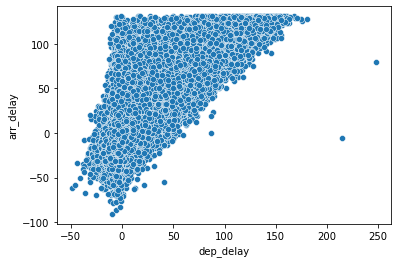

In [7]:
# correlation between dep_delay and arr_delay

sns.scatterplot(data=df, x = 'dep_delay', y= 'arr_delay')

After the removing the outliers in arr_delay and selecting data where the mean is close to 0, there is no direct correlation between arr_delay and dep_delay.

### Checking the relation between 'cancelled' and 'diverted' with arr_delay feature

In [8]:
df.shape

(477399, 45)

In [7]:
# If cancelled = 1 or diverted = 1, arr_delay has no values, so we delete those rows

df[(df['cancelled'] == 1) | (df['diverted'] == 1)]['arr_delay'].isna().sum()

0

In [8]:
df = df[df['cancelled'] != 1]
df = df[df['diverted'] != 1]

### Analysis of Test data, flights_test.csv and comparing with training data, B500fKlight.csv
- 19 features in the test data(we shall use the same feature in exploring our Training data)
- Target feature is arr_delay
- carrier_delay','weather_delay','dep_delay' has to be further explored

In [9]:
df_flights_test = pd.read_csv('flights_test.csv', sep=',', skipinitialspace=True)

In [12]:
df_flights_test.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

In [13]:
df.columns

Index(['fl_date', 'mkt_unique_carrier', 'branded_code_share', 'mkt_carrier',
       'mkt_carrier_fl_num', 'op_unique_carrier', 'tail_num',
       'op_carrier_fl_num', 'origin_airport_id', 'origin', 'origin_city_name',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time', 'dep_time',
       'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in',
       'crs_arr_time', 'arr_time', 'arr_delay', 'cancelled',
       'cancellation_code', 'diverted', 'dup', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'flights', 'distance',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'late_aircraft_delay', 'first_dep_time', 'total_add_gtime',
       'longest_add_gtime', 'no_name', 'month', 'day', 'year'],
      dtype='object')

In [10]:
# CARRIER_DELAY, WEATHER_DELAY, NAS_DELAY, SECURITY_DELAY, LATE_AIRCRAFT_DELAY shouldn't be used directly as predictors 
# as well. However, we can create various transformations from earlier values.


#making a copy of the features of training set based on the flights_test. We can add/del other features in this training set

df_flights = df[['fl_date', 'mkt_unique_carrier', 'branded_code_share', 
        'mkt_carrier', 'mkt_carrier_fl_num',
        'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin_airport_id',
        'origin', 'origin_city_name', 'dest_airport_id', 'dest', 'dest_city_name',
        'crs_dep_time', 'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
        'arr_delay', 'carrier_delay','weather_delay','dep_delay', 'taxi_out', 'taxi_in']]

In [15]:
# df_flights.info

In [16]:
df_flights.isna().sum()

fl_date                    0
mkt_unique_carrier         0
branded_code_share         0
mkt_carrier                0
mkt_carrier_fl_num         0
op_unique_carrier          0
tail_num                   0
op_carrier_fl_num          0
origin_airport_id          0
origin                     0
origin_city_name           0
dest_airport_id            0
dest                       0
dest_city_name             0
crs_dep_time               0
crs_arr_time               0
dup                        0
crs_elapsed_time           0
flights                    0
distance                   0
arr_delay                  0
carrier_delay         394446
weather_delay         394446
dep_delay                  0
taxi_out                   0
taxi_in                    0
dtype: int64

### Dropping unwanted features in the training data

- **fl_date**: Flight Date (yyyy-mm-dd)
- **op_carrier_fl_num**: Flight Number
- **op_unique_carrier**: Unique Scheduled Operating Carrier Code. When the same code has been used by multiple carriers, a numeric suffix is used for earlier users,for example, PA, PA(1), PA(2). Use this field for analysis across a range of years.
- **mkt_carrier**: Code assigned by IATA and commonly used to identify a carrier. As the same code may have been assigned to different carriers over time, the code is not always unique. For analysis, use the Unique Carrier Code.
- **branded_code_share**: Reporting Carrier Operated or Branded Code Share Partners
- **cancelled**: Cancelled Flight Indicator (1=Yes)
- **cancellation_code**: Specifies The Reason For Cancellation
- **carrier_delay**: Carrier Delay, in Minutes
- **weather_delay**: Weather Delay, in Minutes
- **nas_delay**: National Air System Delay, in Minutes
- **security_delay**: Security Delay, in Minutes
- **late_aircraft_delay**: Late Aircraft Delay, in Minutes
- **taxi_out**: Taxi Out Time, in Minutes
- **wheels_off**: Wheels Off Time (local time: hhmm)
- **wheels_on**: Wheels On Time (local time: hhmm)
- **taxi_in**: 	Taxi In Time, in Minutes
- **first_dep_time**: First Gate Departure Time at Origin Airport
- **total_add_gtime**: Total Ground Time Away from Gate for Gate Return or Cancelled Flight
- **longest_add_gtime**: Longest Time Away from Gate for Gate Return or Cancelled Flight
- **origin**: Origin Airport
- **dest**: Destination Airport
- **tail_num**: Tail Number
- **dup**: Duplicate flag marked Y if the flight is swapped based on Form-3A data
- **diverted**: Diverted Flight Indicator (1=Yes)
- **flights**: Number of Flights
- **distance**: Distance between airports (miles)
- **dep_delay**: Difference in minutes between scheduled and actual departure time. Early departures show negative numbers.	


- 'no_name'



In [11]:
# Checking if 'mkt_unique_carrier' and 'mkt_carrier' are the same
df[df['mkt_unique_carrier'] != df['mkt_carrier']]

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name,month,day,year


In [12]:
# 'mkt_unique_carrier' and 'mkt_carrier' are duplicates
df_flights.groupby(['mkt_unique_carrier','mkt_carrier']).arr_delay.count().sort_values(ascending=False)

mkt_unique_carrier  mkt_carrier
AA                  AA             124335
DL                  DL             105283
UA                  UA              90915
WN                  WN              80946
AS                  AS              26591
B6                  B6              17328
NK                  NK              12089
F9                  F9               8003
G4                  G4               6254
HA                  HA               5655
Name: arr_delay, dtype: int64

In [13]:
# checking for 'mkt_unique_carrier' and 'branded_code_share'
df_flights[df_flights['mkt_unique_carrier'] != df_flights['branded_code_share']]\
[['mkt_unique_carrier', 'branded_code_share']]

,mkt_unique_carrier,branded_code_share
4,AA,AA_CODESHARE
6,DL,DL_CODESHARE
7,AA,AA_CODESHARE
9,DL,DL_CODESHARE
12,AA,AA_CODESHARE
...,...,...
499990,DL,DL_CODESHARE
499992,AS,AS_CODESHARE
499996,UA,UA_CODESHARE
499997,AS,AS_CODESHARE


- 'mkt_unique_carrier' and 'mkt_carrier' are duplicates
- The differences between 'mkt_unique_carrier' and 'branded_code_share' is the suffix _CODESHARE
- Hence we can use only one of them i.e. 'mkt_unique_carrier' and drop 'mkt_carrier' and 'branded_code_share' from both training and test data

In [14]:
# Dropping  'branded_code_share' from both Training and test dataset

df_flights = df_flights.drop(columns=['branded_code_share'])
df_flights_test = df_flights_test.drop(columns=['branded_code_share'])

In [15]:
# # Dropping 'mkt_carrier' from both Training and test dataset 

df_flights = df_flights.drop(columns=['mkt_carrier'])
df_flights_test = df_flights_test.drop(columns=['mkt_carrier'])

In [22]:
df_flights.shape

(477399, 24)

In [23]:
df_flights_test.shape

(660556, 18)

### weather_delay Analysis at origin airport

In [16]:
# checking for not NAN values in 'weather_delay', Weather Delay, in Minutes

df_flights[df_flights['weather_delay'].notnull()]

# weather_delay greater than zero minutes
df_flights[df_flights['weather_delay'] > 0].head()

,fl_date,mkt_unique_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,origin_city_name,dest_airport_id,...,dup,crs_elapsed_time,flights,distance,arr_delay,carrier_delay,weather_delay,dep_delay,taxi_out,taxi_in
75,2019-10-11,WN,866,WN,N729SW,866,11259,DAL,"Dallas, TX",10599,...,N,100,1,587,29.0,0.0,9.0,17.0,24.0,2.0
91,2019-02-19,AA,3317,MQ,N249NN,3317,12992,LIT,"Little Rock, AR",11298,...,N,93,1,304,73.0,0.0,50.0,55.0,26.0,16.0
120,2019-05-13,B6,1202,B6,N955JB,1202,11697,FLL,"Fort Lauderdale, FL",12478,...,N,185,1,1069,63.0,0.0,31.0,64.0,40.0,9.0
654,2019-05-23,UA,4600,AX,N10156,4600,11292,DEN,"Denver, CO",14730,...,N,165,1,1024,29.0,0.0,21.0,21.0,32.0,5.0
859,2019-07-17,UA,6341,YV,N86316,6341,12264,IAD,"Washington, DC",13851,...,N,194,1,1136,19.0,0.0,19.0,38.0,15.0,14.0


In [17]:
# weather delay in the origin airport

weather_delay_airport = df_flights.groupby(['origin']).weather_delay.mean().round(0).sort_values(ascending=False)
weather_delay_airport= weather_delay_airport.reset_index()

In [18]:
# Filling NAN with zero

weather_delay_airport.fillna(0,inplace= True)
weather_delay_airport

# Should i bin the values???

,origin,weather_delay
0,EKO,29.0
1,BFF,28.0
2,ART,18.0
3,CYS,18.0
4,RHI,18.0
...,...,...
368,BKG,0.0
369,DLG,0.0
370,GST,0.0
371,HYA,0.0


### dep_delay Analysis at origin airport

In [19]:
# 'dep_delay': Difference in minutes between scheduled & actual departure time. Early departures show negative numbers.

dep_delay_airport= df_flights.groupby(['origin']).dep_delay.mean().round(0).sort_values(ascending=False).reset_index()
dep_delay_airport.head()

,origin,dep_delay
0,DUT,31.0
1,SMX,27.0
2,OWB,24.0
3,LCK,15.0
4,HGR,15.0


### arr_delay Analysis at origin airport

In [20]:
# 'arr_delay': Difference in minutes between scheduled and actual arrival time. Early arrivals show negative numbers.

arr_delay_airport = df_flights.groupby(['origin']).arr_delay.mean().round(0).sort_values(ascending=False).reset_index()
arr_delay_airport

,origin,arr_delay
0,SMX,30.0
1,MMH,23.0
2,HGR,22.0
3,OWB,22.0
4,DUT,18.0
...,...,...
368,CMX,-13.0
369,WYS,-15.0
370,GST,-16.0
371,BKG,-16.0


### taxi_out Analysis at origin airport

In [21]:
# - **taxi_out**: Taxi Out Time, in Minutes

taxi_out_airport = df_flights.groupby(['origin']).taxi_out.mean().round(0).sort_values(ascending=False).reset_index()
taxi_out_airport

,origin,taxi_out
0,MMH,30.0
1,LGA,27.0
2,JFK,26.0
3,EWR,25.0
4,PQI,24.0
...,...,...
368,LNY,5.0
369,DUT,5.0
370,OWB,5.0
371,MKK,4.0


### taxi_in Analysis at origin airport

In [22]:
# - **taxi_in**: 	Taxi In Time, in Minutes

taxi_in_airport = df_flights.groupby(['origin']).taxi_in.mean().round(0).sort_values(ascending=False).reset_index()
taxi_in_airport

,origin,taxi_in
0,BFM,21.0
1,DBQ,17.0
2,FLO,15.0
3,ALO,15.0
4,CMI,15.0
...,...,...
368,DUT,4.0
369,OME,4.0
370,SCC,4.0
371,OTZ,4.0


In [23]:
df_flights[['origin', 'origin_airport_id', 'origin_city_name']].head()

,origin,origin_airport_id,origin_city_name
0,SFO,14771,"San Francisco, CA"
1,AVL,10431,"Asheville, NC"
2,ATL,10397,"Atlanta, GA"
3,SFO,14771,"San Francisco, CA"
4,DFW,11298,"Dallas/Fort Worth, TX"


In [32]:
df_flights['origin'].unique()

array(['SFO', 'AVL', 'ATL', 'DFW', 'DCA', 'SGF', 'LAX', 'RIC', 'FCA',
       'ORD', 'SAN', 'PHX', 'DEN', 'BHM', 'JFK', 'SAV', 'SEA', 'HOU',
       'ANC', 'PHL', 'MCO', 'BUR', 'DAY', 'CVG', 'LIT', 'MKE', 'RSW',
       'CLT', 'RDU', 'DTW', 'PIA', 'SBA', 'IND', 'JAC', 'LGA', 'BWI',
       'TUL', 'SDF', 'TYS', 'ALB', 'SMF', 'MSY', 'MDW', 'DAL', 'CMH',
       'PBI', 'SHV', 'BOS', 'PSP', 'MOB', 'LAS', 'MCI', 'GFK', 'EWR',
       'SJC', 'TPA', 'STL', 'FLL', 'BNA', 'CLE', 'MFE', 'ONT', 'ACY',
       'MSP', 'JAX', 'HNL', 'MIA', 'ROA', 'SLC', 'GTR', 'IAH', 'SUN',
       'SCE', 'BIL', 'CHS', 'EVV', 'PIE', 'PDX', 'BTV', 'LFT', 'LEX',
       'BUF', 'ROC', 'MSN', 'GNV', 'BFL', 'BIS', 'SYR', 'ISP', 'AUS',
       'OAK', 'MDT', 'LNY', 'HSV', 'EYW', 'AMA', 'XNA', 'SNA', 'MSO',
       'PIT', 'BQN', 'GSP', 'LAN', 'BDL', 'BTR', 'HPN', 'PWM', 'OMA',
       'IAD', 'MMH', 'CHO', 'TUS', 'AZA', 'JNU', 'JHM', 'FSD', 'COS',
       'MEM', 'CID', 'GEG', 'ORF', 'SJU', 'RFD', 'GRR', 'RNO', 'PVD',
       'SRQ', 'LRD',

In [33]:
df_flights['origin'].nunique()

373

In [34]:
df_flights['origin_airport_id'].nunique()

373

In [35]:
df_flights['origin_city_name'].nunique()

365

- origin: Origin Airport and origin_city_name: Origin Airport, City Name, seem to be the same, i choose to use origin for simplicity.

- origin_airport_id: Origin Airport, Airport ID is an identification number. Use this field for airport analysis across a range of years because an airport can change its airport code and airport codes can be reused. origin_airport_id, has codes in it, hence we can drop this feature.


In [24]:
df_flights = df_flights.drop(columns=['origin_airport_id', 'origin_city_name'])
df_flights_test = df_flights_test.drop(columns=['origin_airport_id', 'origin_city_name'])

In [37]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance',
       'arr_delay', 'carrier_delay', 'weather_delay', 'dep_delay', 'taxi_out',
       'taxi_in'],
      dtype='object')

In [38]:
df_flights_test.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin',
       'dest_airport_id', 'dest', 'dest_city_name', 'crs_dep_time',
       'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights', 'distance'],
      dtype='object')

### weather_delay Analysis at destination airport

In [25]:
# weather delay in the origin airport

weather_delay_dest_airport = df_flights.groupby(['dest']).weather_delay.mean().round(0).sort_values(ascending=False)
weather_delay_dest_airport= weather_delay_dest_airport.reset_index()

In [26]:
# Filling NAN with zero

weather_delay_dest_airport.fillna(0,inplace= True)
weather_delay_dest_airport

# Should i bin the values???

,dest,weather_delay
0,OWB,67.0
1,GGG,18.0
2,CIU,18.0
3,GUC,16.0
4,TYR,14.0
...,...,...
368,BFM,0.0
369,DLG,0.0
370,GST,0.0
371,HYA,0.0


### I think we can do the same analysis for the destination airport and drop the columns dest_airport_id and dest_city_name

In [27]:
df_flights = df_flights.drop(columns=['dest_airport_id', 'dest_city_name'])

In [28]:
df_flights_test = df_flights_test.drop(columns=['dest_airport_id', 'dest_city_name'])

In [43]:
df_flights_test.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'op_carrier_fl_num', 'origin', 'dest',
       'crs_dep_time', 'crs_arr_time', 'dup', 'crs_elapsed_time', 'flights',
       'distance'],
      dtype='object')

In [29]:
# The dup column has only data 'N'
df_flights['dup'].unique()

array(['N'], dtype=object)

In [30]:
# drop the dup column from both training and test data
df_flights = df_flights.drop(columns=['dup'])

df_flights_test = df_flights_test.drop(columns=['dup'])

### Relation between 'mkt_carrier_fl_num' and 'op_carrier_fl_num'

In [31]:
df_flights[df_flights['mkt_carrier_fl_num'] != df_flights['op_carrier_fl_num']][['mkt_carrier_fl_num', 'op_carrier_fl_num']].count()

mkt_carrier_fl_num    46
op_carrier_fl_num     46
dtype: int64

- 46 rows that has the difference between 'mkt_carrier_fl_num' and 'op_carrier_fl_num'
we can assume they are almost the same. Drop one of them

In [32]:
df_flights = df_flights.drop(columns=['op_carrier_fl_num'])
df_flights_test = df_flights_test.drop(columns=['op_carrier_fl_num'])

In [33]:
# Flights has only 1 value = 1
df_flights['flights'].unique()

# Drop the flights column
df_flights = df_flights.drop(columns=['flights'])
df_flights_test = df_flights_test.drop(columns=['flights'])

In [49]:
df_flights.columns

Index(['fl_date', 'mkt_unique_carrier', 'mkt_carrier_fl_num',
       'op_unique_carrier', 'tail_num', 'origin', 'dest', 'crs_dep_time',
       'crs_arr_time', 'crs_elapsed_time', 'distance', 'arr_delay',
       'carrier_delay', 'weather_delay', 'dep_delay', 'taxi_out', 'taxi_in'],
      dtype='object')

In [50]:
#'taxi_out', 'taxi_in', i dont know if they have significance

In [ ]:
# 'carrier_delay', 'weather_delay', keeping this

In [ ]:
 # 'dep_delay', i dont know what to do with this

In [36]:
# filling NAN values to zero

df['carrier_delay'].fillna(0,inplace= True)
df['weather_delay'].fillna(0,inplace= True)

In [37]:
# Dropping unwanted features

#'carrier_delay', 'weather_delay', 

df.drop(['mkt_carrier', 'branded_code_share','cancelled', 'cancellation_code', 
         'nas_delay',  'security_delay','late_aircraft_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 
        'no_name', 'first_dep_time','total_add_gtime', 'longest_add_gtime', 'origin', 'dest', 'tail_num', 'dup', 
        'diverted','flights', 'dep_delay', 'op_carrier_fl_num', 'op_unique_carrier', 'distance', 'fl_date'], 
        axis=1, inplace=True)

In [38]:
df.head()

,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay,month,day,year
0,AA,1059,14771,"San Francisco, CA",12892,"Los Angeles, CA",1026,1022.0,1205,1143.0,-22.0,99,81.0,58.0,0.0,0.0,9,5,2019
1,DL,1216,10431,"Asheville, NC",10397,"Atlanta, GA",600,553.0,701,648.0,-13.0,61,55.0,33.0,0.0,0.0,6,1,2019
2,UA,236,10397,"Atlanta, GA",12264,"Washington, DC",1430,1427.0,1617,1630.0,13.0,107,123.0,89.0,0.0,0.0,6,2,2019
3,AS,1936,14771,"San Francisco, CA",12892,"Los Angeles, CA",1800,1841.0,1935,2009.0,34.0,95,88.0,54.0,2.0,0.0,9,2,2019
4,AA,5714,11298,"Dallas/Fort Worth, TX",11973,"Gulfport/Biloxi, MS",1025,1211.0,1203,1347.0,104.0,98,96.0,72.0,22.0,0.0,5,6,2019


In [39]:
df['mkt_unique_carrier'].replace({
    'AA': 0,
    'DL': 1,
    'UA': 2,
    'AS': 3,
    'WN': 4,
    'B6': 5,
    'HA': 6,
    'F9': 7,
    'NK': 8,
    'G4': 9
    
}, inplace = True)

In [56]:
df.head()

,mkt_unique_carrier,mkt_carrier_fl_num,origin_airport_id,origin_city_name,dest_airport_id,dest_city_name,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay,month,day,year
0,0,1059,14771,"San Francisco, CA",12892,"Los Angeles, CA",1026,1022.0,1205,1143.0,-22.0,99,81.0,58.0,0.0,0.0,9,5,2019
1,1,1216,10431,"Asheville, NC",10397,"Atlanta, GA",600,553.0,701,648.0,-13.0,61,55.0,33.0,0.0,0.0,6,1,2019
2,2,236,10397,"Atlanta, GA",12264,"Washington, DC",1430,1427.0,1617,1630.0,13.0,107,123.0,89.0,0.0,0.0,6,2,2019
3,3,1936,14771,"San Francisco, CA",12892,"Los Angeles, CA",1800,1841.0,1935,2009.0,34.0,95,88.0,54.0,2.0,0.0,9,2,2019
4,0,5714,11298,"Dallas/Fort Worth, TX",11973,"Gulfport/Biloxi, MS",1025,1211.0,1203,1347.0,104.0,98,96.0,72.0,22.0,0.0,5,6,2019


In [ ]:
df['origin_city_name'].unique()

In [58]:
df['arr_delay'].describe()

count    477399.000000
mean         -0.009225
std          26.284630
min         -91.000000
25%         -15.000000
50%          -7.000000
75%           6.000000
max         131.000000
Name: arr_delay, dtype: float64

# Trial with limited features

In [40]:
# Making a new copy of the dataframe df

df_clean_data = df.copy()

In [41]:
# dropping columns mkt_unique_carrier	mkt_carrier_fl_num	origin_airport_id	origin_city_name	
# dest_airport_id	dest_city_name	year, month

df_clean_data.drop(['mkt_unique_carrier', 'mkt_carrier_fl_num', 'origin_airport_id', 
                    'origin_city_name', 'dest_airport_id', 'dest_city_name', 'year'], axis = 1, inplace = True)

df_clean_data.head(5)


,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay,month,day
0,1026,1022.0,1205,1143.0,-22.0,99,81.0,58.0,0.0,0.0,9,5
1,600,553.0,701,648.0,-13.0,61,55.0,33.0,0.0,0.0,6,1
2,1430,1427.0,1617,1630.0,13.0,107,123.0,89.0,0.0,0.0,6,2
3,1800,1841.0,1935,2009.0,34.0,95,88.0,54.0,2.0,0.0,9,2
4,1025,1211.0,1203,1347.0,104.0,98,96.0,72.0,22.0,0.0,5,6


In [42]:
df_clean_data.isnull().any()

crs_dep_time           False
dep_time               False
crs_arr_time           False
arr_time               False
arr_delay              False
crs_elapsed_time       False
actual_elapsed_time    False
air_time               False
carrier_delay          False
weather_delay          False
month                  False
day                    False
dtype: bool

In [43]:
df_clean_data = df_clean_data.dropna()
df_clean_data

,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay,month,day
0,1026,1022.0,1205,1143.0,-22.0,99,81.0,58.0,0.0,0.0,9,5
1,600,553.0,701,648.0,-13.0,61,55.0,33.0,0.0,0.0,6,1
2,1430,1427.0,1617,1630.0,13.0,107,123.0,89.0,0.0,0.0,6,2
3,1800,1841.0,1935,2009.0,34.0,95,88.0,54.0,2.0,0.0,9,2
4,1025,1211.0,1203,1347.0,104.0,98,96.0,72.0,22.0,0.0,5,6
...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1600,1557.0,1906,1853.0,-13.0,186,176.0,157.0,0.0,0.0,3,6
499996,1420,1420.0,1759,1801.0,2.0,159,161.0,140.0,0.0,0.0,11,6
499997,815,806.0,1030,1014.0,-16.0,135,128.0,106.0,0.0,0.0,3,0
499998,940,940.0,1130,1120.0,-10.0,110,100.0,66.0,0.0,0.0,1,3


In [44]:
# copy day feature for one-hot encoded Day
df_day = df_clean_data['day']

df_clean_data.drop(['day'], axis = 1, inplace = True)

df_clean_data.head(5)

,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay,month
0,1026,1022.0,1205,1143.0,-22.0,99,81.0,58.0,0.0,0.0,9
1,600,553.0,701,648.0,-13.0,61,55.0,33.0,0.0,0.0,6
2,1430,1427.0,1617,1630.0,13.0,107,123.0,89.0,0.0,0.0,6
3,1800,1841.0,1935,2009.0,34.0,95,88.0,54.0,2.0,0.0,9
4,1025,1211.0,1203,1347.0,104.0,98,96.0,72.0,22.0,0.0,5


In [45]:
# copy month feature for one-hot encoded Month
df_month = df_clean_data['month']

df_clean_data.drop(['month'], axis = 1, inplace = True)

df_clean_data.head(5)


,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay
0,1026,1022.0,1205,1143.0,-22.0,99,81.0,58.0,0.0,0.0
1,600,553.0,701,648.0,-13.0,61,55.0,33.0,0.0,0.0
2,1430,1427.0,1617,1630.0,13.0,107,123.0,89.0,0.0,0.0
3,1800,1841.0,1935,2009.0,34.0,95,88.0,54.0,2.0,0.0
4,1025,1211.0,1203,1347.0,104.0,98,96.0,72.0,22.0,0.0


In [46]:
# Data Standardization

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_data_scaled = pd.DataFrame(scaler.fit_transform(df_clean_data.astype(float)),
                                   columns=df_clean_data.columns)

In [66]:
df_data_scaled

,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay
0,-0.610004,-0.610349,-0.532846,-0.603604,-0.836641,-0.554503,-0.731015,-0.719988,-0.206302,-0.070061
1,-1.478167,-1.546585,-1.506784,-1.535459,-0.494235,-1.087305,-1.096042,-1.080213,-0.206302,-0.070061
2,0.213324,0.198128,0.263309,0.313191,0.494937,-0.442334,-0.141356,-0.273310,-0.206302,-0.070061
3,0.967363,1.024570,0.877817,1.026672,1.293884,-0.610587,-0.632738,-0.777624,-0.013277,-0.070061
4,-0.612042,-0.233060,-0.536711,-0.219567,3.957040,-0.568524,-0.520422,-0.518262,1.916976,-0.070061
...,...,...,...,...,...,...,...,...,...,...
477394,0.559774,0.457639,0.821777,0.732996,-0.494235,0.665334,0.602738,0.706501,-0.206302,-0.070061
477395,0.192945,0.184154,0.537712,0.635105,0.076441,0.286764,0.392146,0.461548,-0.206302,-0.070061
477396,-1.040010,-1.041536,-0.871019,-0.846451,-0.608370,-0.049743,-0.071158,-0.028357,-0.206302,-0.070061
477397,-0.785267,-0.774040,-0.677777,-0.646902,-0.380100,-0.400271,-0.464264,-0.604716,-0.206302,-0.070061


In [47]:
# Creating dummy variable for day feature

day_dummy = pd.get_dummies(df_day.astype(str), drop_first=True)
day_dummy.shape

# concatinating month_dummy with the scaled data

df_data_scaled = pd.concat([df_data_scaled, day_dummy], axis=1)
df_data_scaled.head()

,crs_dep_time,dep_time,crs_arr_time,arr_time,arr_delay,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay,1,2,3,4,5,6
0,-0.610004,-0.610349,-0.532846,-0.603604,-0.836641,-0.554503,-0.731015,-0.719988,-0.206302,-0.070061,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.478167,-1.546585,-1.506784,-1.535459,-0.494235,-1.087305,-1.096042,-1.080213,-0.206302,-0.070061,1.0,0.0,0.0,0.0,0.0,0.0
2,0.213324,0.198128,0.263309,0.313191,0.494937,-0.442334,-0.141356,-0.273310,-0.206302,-0.070061,0.0,1.0,0.0,0.0,0.0,0.0
3,0.967363,1.024570,0.877817,1.026672,1.293884,-0.610587,-0.632738,-0.777624,-0.013277,-0.070061,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.612042,-0.233060,-0.536711,-0.219567,3.957040,-0.568524,-0.520422,-0.518262,1.916976,-0.070061,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
# Creating dummy variable for month feature

#month_dummy = pd.get_dummies(df_month.astype(str), drop_first=True)
#month_dummy.shape

In [69]:
# concatinating month_dummy with the scaled data

#df_data_scaled = pd.concat([df_data_scaled, month_dummy], axis=1)
#df_data_scaled.head()

In [48]:
df_data_scaled.isnull().any()

crs_dep_time           True
dep_time               True
crs_arr_time           True
arr_time               True
arr_delay              True
crs_elapsed_time       True
actual_elapsed_time    True
air_time               True
carrier_delay          True
weather_delay          True
1                      True
2                      True
3                      True
4                      True
5                      True
6                      True
dtype: bool

In [49]:
# dropping nan rows
df_data_scaled = df_data_scaled.dropna()

In [50]:
# Writing cleaned data into an CSV file

df_data_scaled.to_csv("clean_flight_data.csv", sep=',', index = False)

In [51]:
#Feature Selection
#split dataset into features and target variable

X = df_data_scaled.drop(['arr_delay'], axis = 1)
y = df_data_scaled['arr_delay']

In [52]:
X

,crs_dep_time,dep_time,crs_arr_time,arr_time,crs_elapsed_time,actual_elapsed_time,air_time,carrier_delay,weather_delay,1,2,3,4,5,6
0,-0.610004,-0.610349,-0.532846,-0.603604,-0.554503,-0.731015,-0.719988,-0.206302,-0.070061,0.0,0.0,0.0,0.0,1.0,0.0
1,-1.478167,-1.546585,-1.506784,-1.535459,-1.087305,-1.096042,-1.080213,-0.206302,-0.070061,1.0,0.0,0.0,0.0,0.0,0.0
2,0.213324,0.198128,0.263309,0.313191,-0.442334,-0.141356,-0.273310,-0.206302,-0.070061,0.0,1.0,0.0,0.0,0.0,0.0
3,0.967363,1.024570,0.877817,1.026672,-0.610587,-0.632738,-0.777624,-0.013277,-0.070061,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.612042,-0.233060,-0.536711,-0.219567,-0.568524,-0.520422,-0.518262,1.916976,-0.070061,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477394,0.559774,0.457639,0.821777,0.732996,0.665334,0.602738,0.706501,-0.206302,-0.070061,0.0,1.0,0.0,0.0,0.0,0.0
477395,0.192945,0.184154,0.537712,0.635105,0.286764,0.392146,0.461548,-0.206302,-0.070061,0.0,1.0,0.0,0.0,0.0,0.0
477396,-1.040010,-1.041536,-0.871019,-0.846451,-0.049743,-0.071158,-0.028357,-0.206302,-0.070061,0.0,0.0,0.0,0.0,0.0,1.0
477397,-0.785267,-0.774040,-0.677777,-0.646902,-0.400271,-0.464264,-0.604716,-0.206302,-0.070061,0.0,0.0,0.0,0.0,1.0,0.0


In [53]:
# Dimensional Reductionality
from sklearn.decomposition import PCA

n_components = 2
pca = PCA(n_components=n_components)
components = pca.fit_transform(X)
labels = {
    str(i): f'PC {i+1} ({var:.1f}%)'
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}


total_var = pca.explained_variance_ratio_.sum() * 100
print(f'Total Explained Variance: {total_var:.2f}%')

labels

Total Explained Variance: 64.34%


{'0': 'PC 1 (33.8%)', '1': 'PC 2 (30.6%)'}

In [54]:
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101) # 70% training and 30% test

In [55]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((319066, 15), (136743, 15))

In [56]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# import MAE from sklearn
from sklearn.metrics import mean_absolute_error

# Baseline Model, fit and predict linear regression

lr = LinearRegression()
lr.fit(X_train,y_train)
y_lr = lr.predict(X_train)

print("LR-MAE for the Training set: ",mean_absolute_error(y_train, y_lr))
print("LR-Score for the Training set: ", lr.score(X_train, y_train)) # R2 score

LR-MAE for the Training set:  0.3870761352421382
LR-Score for the Training set:  0.5400298733454992


In [57]:
# Predicting using the test set

y_test_lr = lr.predict(X_test)
print("MAE for the test set: ", mean_absolute_error(y_test, y_test_lr))
print("LR-Score for the Test set: ", lr.score(X_test, y_test_lr))

MAE for the test set:  0.3873412110639489
LR-Score for the Test set:  1.0


In [58]:
# creating ridge regression
rr = Ridge(alpha=0.1)
rr.fit(X_train,y_train)
y_rr = rr.predict(X_train)
print("RR-MAE for the Training set: ",mean_absolute_error(y_train, y_rr))

y__test_rr = rr.predict(X_test)
print("RR-MAE for the Test set: ",mean_absolute_error(y_test, y__test_rr))

RR-MAE for the Training set:  0.3870764969721132
RR-MAE for the Test set:  0.3873415449855285


In [59]:
# According to MAE, what is the better model?

if mean_absolute_error(y_train, y_lr) < mean_absolute_error(y_train, y_rr):
    print("Linear Regression is better")
else:
    print("Ridge Regression is better")

Linear Regression is better


In [60]:
# import r2_score from sklearn
from sklearn.metrics import r2_score

print("LR-R2 Score for the Training set: ",r2_score(y_train, y_lr)) # linear Regression

LR-R2 Score for the Training set:  0.5400298733454992


In [61]:
print("RR-R2 Score for the Training set: ",r2_score(y_train, y_rr)) # ridge regression

RR-R2 Score for the Training set:  0.5400298732694357


In [62]:
# Gridsearch

#Use grid_search to find the best value of the parameter alpha for Ridge and Lasso regressions

from sklearn.model_selection import GridSearchCV

In [63]:
#define possible alphas
param_grid = [{'alpha': [0.0001, 0.001, 0.01, 0.1]}]

#create gridsearch object
gridsearch_obj = GridSearchCV(estimator=rr, scoring='r2', param_grid=param_grid, n_jobs=-1)

#save fit to training data set
rr_fit = gridsearch_obj.fit(X_train, y_train)

# View the accuracy score
print('Training score for Ridge:', gridsearch_obj.best_score_) 
print('Best alpha for Ridge:', gridsearch_obj.best_estimator_.alpha)


Training score for Ridge: 0.5399567149536291
Best alpha for Ridge: 0.1


In [64]:
#save fit to Test data set
rr__test_fit = gridsearch_obj.fit(X_test, y_test)

# View the accuracy score
print('Test score for Ridge:', gridsearch_obj.best_score_) 
print('Best alpha for Ridge:', gridsearch_obj.best_estimator_.alpha)


Test score for Ridge: 0.5302784409925121
Best alpha for Ridge: 0.1


In [65]:
#define possible alphas

# lasso Regression
ll = Lasso()
param_grid = [{'alpha': [0.0001, 0.001, 0.01, 0.1]}]

#create gridsearch object
gridsearch_obj = GridSearchCV(estimator=ll, scoring='r2', param_grid=param_grid, n_jobs=-1)

#save fit to training data set
ll_fit = gridsearch_obj.fit(X_train, y_train)

# View the accuracy score
print('Training score for Lasso:', gridsearch_obj.best_score_) 
print('Best alpha for Lasso:', gridsearch_obj.best_estimator_.alpha)


Training score for Lasso: 0.5399592829404679
Best alpha for Lasso: 0.0001


### Random Forest

In [66]:
# import Random Forest classifier
from sklearn.ensemble import RandomForestRegressor

In [67]:
# instantiate the regressor with default parameters of n_estimators = 10
rfr = RandomForestRegressor(n_estimators=10, random_state=0)

In [68]:
# fit the model
rfr.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [69]:
# Predict the Test set results
y_pred = rfr.predict(X_test)

In [70]:
print("Random Forest R2 Score: ",r2_score(y_test, y_pred)) 

Random Forest R2 Score:  0.9874685882208614


In [71]:
#Using grid search

from sklearn.metrics import SCORERS


#create grid (optimize for number of trees and max depth in one tree)
#Scorers

param_grid = {
    'max_depth' : [4, 5, 6, 7, 8, 9, 10],
    'n_estimators' : [10, 50, 100, 150]
    }


In [75]:
# rfc - random forest regressor

from sklearn.model_selection import GridSearchCV

CV_rfr = GridSearchCV(estimator= rfr, param_grid=param_grid, 
                      scoring = ['r2'], 
                      cv= 5,
                      refit = 'r2',
                      verbose = 4)

CV_rfr.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV 1/5] END ..max_depth=4, n_estimators=10; r2: (test=0.411) total time=   3.8s
[CV 2/5] END ..max_depth=4, n_estimators=10; r2: (test=0.420) total time=   3.6s
[CV 3/5] END ..max_depth=4, n_estimators=10; r2: (test=0.413) total time=   3.6s
[CV 4/5] END ..max_depth=4, n_estimators=10; r2: (test=0.411) total time=   3.4s
[CV 5/5] END ..max_depth=4, n_estimators=10; r2: (test=0.402) total time=   3.3s
[CV 1/5] END ..max_depth=4, n_estimators=50; r2: (test=0.412) total time=  19.4s
[CV 2/5] END ..max_depth=4, n_estimators=50; r2: (test=0.420) total time=  19.6s
[CV 3/5] END ..max_depth=4, n_estimators=50; r2: (test=0.415) total time=  17.8s
[CV 4/5] END ..max_depth=4, n_estimators=50; r2: (test=0.412) total time=  19.5s
[CV 5/5] END ..max_depth=4, n_estimators=50; r2: (test=0.402) total time=  17.1s
[CV 1/5] END .max_depth=4, n_estimators=100; r2: (test=0.411) total time=  34.3s
[CV 2/5] END .max_depth=4, n_estimators=100; r2

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(n_estimators=10, random_state=0),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [10, 50, 100, 150]},
             refit='r2', scoring=['r2'], verbose=4)

In [76]:
print(CV_rfr.best_estimator_)

RandomForestRegressor(max_depth=10, n_estimators=150, random_state=0)


In [77]:
rfr_best = RandomForestRegressor(max_depth=10, random_state=0)
rfr_best.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [78]:
# Predict the Test set results
y_pred_best = rfr_best.predict(X_test)

In [79]:
print("Random Forest with Grid Search R2 Score: ",r2_score(y_test, y_pred_best)) 

Random Forest with Grid Search R2 Score:  0.6707090034864107


### Ensemble

In [80]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

In [81]:
# convert the dataset into an optimized data structure called Dmatrix

data_dmatrix = xgb.DMatrix(data=X,label=y)

In [84]:
# Instantiate an XGBoost regressor object by calling the XGBRegressor() class from the XGBoost library with the 
# hyper-parameters passed as arguments

xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.5, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

In [87]:
# Fit training data and predict with test data

xg_reg.fit(X_train,y_train)

y_test_pred = xg_reg.predict(X_test)

In [89]:
# Compute the root mean squared error

rmse = mean_squared_error(y_test, y_test_pred, squared = False)
print("RMSE: %f" % (rmse))

# Compute the mean squared error

mse = mean_squared_error(y_test, y_test_pred)
print("MSE: %f" % (mse))

RMSE: 0.821591
MSE: 0.675012


In [90]:
print("XGBoost R2 Score: ",r2_score(y_test, y_test_pred)) 

XGBoost R2 Score:  0.3191394345229218


In [91]:
# k-fold Cross Validation using XGBoost

# create a hyper-parameter dictionary params which holds all the hyper-parameters and their values as key-value pairs 
# but will exclude the n_estimators from the hyper-parameter dictionary because you will use num_boost_rounds instead.

params = {"objective":"reg:squarederror",'colsample_bytree': 0.5,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50, early_stopping_rounds=10, metrics="rmse", as_pandas=True, seed=123)

# cv_results contains train and test RMSE metrics for each boosting round.

print(cv_results.head())

# Extract and print the final boosting round metric(present at the end)

print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0         1.073462        0.001059        1.073598       0.002047
1         1.032608        0.013266        1.032702       0.011237
2         0.995133        0.007614        0.995221       0.004914
3         0.959319        0.011310        0.959359       0.009655
4         0.924629        0.010723        0.924697       0.009395
49    0.609496
Name: test-rmse-mean, dtype: float64


In [93]:
# Use GridSearchCV to find optimal paramaters of models

from sklearn.model_selection import GridSearchCV
from xgboost.sklearn import XGBRegressor

# Various hyper-parameters to tune

xgb1 = XGBRegressor()

parameters = {'objective':['reg:squarederror'],
              'colsample_bytree': [0.5, 0.6, 0.7, 0.8],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'n_estimators': [100]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train, y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 2 folds for each of 36 candidates, totalling 72 fits
0.8828941282104754
{'colsample_bytree': 0.8, 'learning_rate': 0.07, 'max_depth': 7, 'n_estimators': 100, 'objective': 'reg:squarederror'}


In [104]:
# Alpha - L1 regularization on leaf weights (Lasso Regression)


xg_reg_L1 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.07,
                max_depth = 7, alpha = 8, n_estimators = 100)

# Fit training data and predict with test data

xg_reg_L1.fit(X_train,y_train)

preds = xg_reg_L1.predict(X_test)

# Compute the root mean squared error
rmse = mean_squared_error(y_test, preds, squared = False)
print("Lasso RMSE: %f" % (rmse))

# Compute the mean squared error
mse = mean_squared_error(y_test, preds)
print("Lasso MSE: %f" % (mse))

Lasso RMSE: 0.354516
Lasso MSE: 0.125682


alpha = 10, Lasso RMSE: 0.358267, Lasso MSE: 0.128355

alpha = 8, Lasso RMSE: 0.354516, Lasso MSE: 0.125682

alpha = 6, Lasso RMSE: 0.357340, Lasso MSE: 0.127692

In [113]:
# lambda - L2 regularization on leaf weights (Ridge Regression)

xg_reg_L2 = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.8, learning_rate = 0.07,
                max_depth = 7, reg_lambda = 10, n_estimators = 100)

# Fit training data and predict with test data

xg_reg_L2.fit(X_train,y_train)

preds = xg_reg_L2.predict(X_test)

# Compute the root mean squared error
rmse = mean_squared_error(y_test, preds, squared = False)
print("Ridge RMSE: %f" % (rmse))

# Compute the mean squared error
mse = mean_squared_error(y_test, preds)
print("Ridge MSE: %f" % (mse))

Ridge RMSE: 0.345872
Ridge MSE: 0.119627


reg_lambda = 10, Ridge RMSE: 0.345872, Ridge MSE: 0.119627

reg_lambda = 15, Ridge RMSE: 0.346135, Ridge MSE: 0.119810

reg_lambda = 9, Ridge RMSE: 0.348422, Ridge MSE: 0.121398

## Model prediction using Flights_test

In [ ]:
df_test = pd.read_csv('flights_test.csv', sep=',', skipinitialspace=True)

In [ ]:
df_test.columns

In [ ]:
y_lr = lr.predict(df_test)

print("LR-MAE for the Training set: ",mean_absolute_error(y_train, y_lr))

In [ ]:
X.columns